In [1]:
from utils.polygonalizer import Polygonalizer

## Generate Example Particle Trajectory

$$m\frac{d^2x}{dt^2} = -kx+F_{ext}(t)$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
m = 1.0           # Mass of the particle
k = 1.0           # Spring constant
x0 = 5.0          # Initial position
v0 = 0.0          # Initial velocity
t_max = 20.0      # Maximum time for simulation
n_frames = 2000    # Number of time steps for simulation
dt = t_max / n_frames  # Time step size

# Time grid
t = np.linspace(0, t_max, n_frames)

# Random external force (Gaussian noise with mean 0 and stddev 0.1)
force_noise = np.random.normal(48, 196, size=n_frames)

# Initial conditions for position and velocity
x = np.zeros(n_frames)
v = np.zeros(n_frames)
x[0] = x0
v[0] = v0

# Numerical integration (Euler's method)
for i in range(1, n_frames):
    # Compute acceleration: a = F_ext(t) / m - k * x(t) / m
    a = force_noise[i] / m - k * x[i - 1] / m
    # Update position and velocity using Euler's method
    v[i] = v[i - 1] + a * dt
    x[i] = x[i - 1] + v[i] * dt



In [3]:
trajectory = [[x[i], v[i]] for i in range(len(x))]

In [4]:
polygonalizer = Polygonalizer()

In [5]:
segments = polygonalizer.polygonalizing_by_trajectory(trajectory, dim = 2)

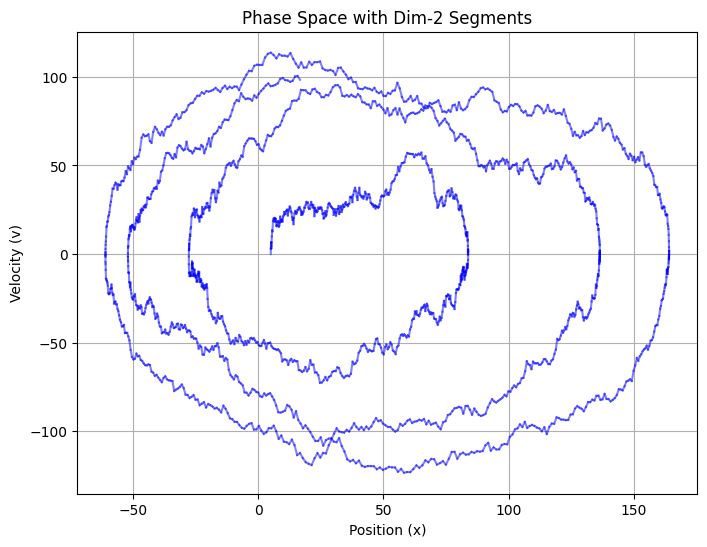

In [6]:
# Plot each segment
plt.figure(figsize=(8, 6))
for segment in segments:
    # Each segment is a pair of points: [start_point, end_point]
    start_point = segment[0]
    end_point = segment[1]
    plt.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], color='b', alpha=0.5)

plt.xlabel('Position (x)')
plt.ylabel('Velocity (v)')
plt.title('Phase Space with Dim-2 Segments')
plt.grid(True)
plt.show()

In [7]:
from utils.utils import geometry_graph_from_segments
graph = geometry_graph_from_segments(segments)

In [8]:
from grammar_induction.graph_analyzer import GraphAnalyzer

In [9]:
graph_analyzer = GraphAnalyzer()

In [11]:
graph_analyzer.analyze(graph)

TypeError: _vertex_expansion() missing 1 required positional argument: 'ctx'